## Observations and Insights 

1. There is a positive correlation between weight and tumor volume, as a mice's weight increases so does the tumor volume.
2. Capomulin and Ramicane appear to to better than Infubinol and Cestamin at reducing tumor volume after the treatment
3. There were duplicate entries for mouse g989 - some of the timepoints were duplicated, and some entered with a different value.
4. Capomulin and Ramicane had the most tests.

In [313]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(study_results.head(25))
# print(mouse_metadata.head(25))
# Combine the data into a single dataset
combinedData = pd.concat([study_results.set_index('Mouse ID'),mouse_metadata.set_index('Mouse ID')],axis=1,join='inner').reset_index()
combinedData.columns = combinedData.columns.str.replace(' ','_')
combinedData.columns = map(str.lower,combinedData)
# Display the data table for preview
combinedData.head()


,mouse_id,timepoint,tumor_volume_(mm3),metastatic_sites,drug_regimen,sex,age_months,weight_(g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [314]:
# Checking the number of mice.
print('Number of Mice: '+str(len(combinedData['mouse_id'].value_counts())))
print('Number of Rows: '+str(len(combinedData.index)))

Number of Mice: 249
Number of Rows: 1893


In [315]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupeMouse = combinedData.loc[combinedData.duplicated(subset=['mouse_id','timepoint']),'mouse_id'].unique()[0]
dupeMouse


'g989'

In [316]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedData.loc[combinedData['mouse_id'] == dupeMouse] 


,mouse_id,timepoint,tumor_volume_(mm3),metastatic_sites,drug_regimen,sex,age_months,weight_(g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [317]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanCombined_df = combinedData.drop(combinedData[combinedData['mouse_id'] == dupeMouse].index)
cleanCombined_df

,mouse_id,timepoint,tumor_volume_(mm3),metastatic_sites,drug_regimen,sex,age_months,weight_(g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [318]:
#Confirm that there are no dupes
cleanCombined_df.loc[cleanCombined_df['mouse_id'] == dupeMouse] 


,mouse_id,timepoint,tumor_volume_(mm3),metastatic_sites,drug_regimen,sex,age_months,weight_(g)


In [319]:
# Checking the number of mice in the clean DataFrame.
print('Number of Mice: '+str(len(cleanCombined_df['mouse_id'].value_counts())))
print('Number of Rows: '+str(len(cleanCombined_df.index)))

Number of Mice: 248
Number of Rows: 1880


## Summary Statistics

In [320]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumorMean = cleanCombined_df.groupby('drug_regimen').mean()['tumor_volume_(mm3)']
tumorMed = cleanCombined_df.groupby('drug_regimen').median()['tumor_volume_(mm3)']
tumorVar = cleanCombined_df.groupby('drug_regimen').var()['tumor_volume_(mm3)']
tumorStd = cleanCombined_df.groupby('drug_regimen').std()['tumor_volume_(mm3)']
tumorSem = cleanCombined_df.groupby('drug_regimen').sem()['tumor_volume_(mm3)']
simpleSummary_df = pd.DataFrame({'mean':tumorMean,'median':tumorMed,'variance':tumorVar,'std':tumorStd,'sem':tumorSem})
simpleSummary_df


,mean,median,variance,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [321]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
aggSummary_df = cleanCombined_df.groupby('drug_regimen').agg(['mean','median','var','std','sem'])['tumor_volume_(mm3)']
aggSummary_df

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

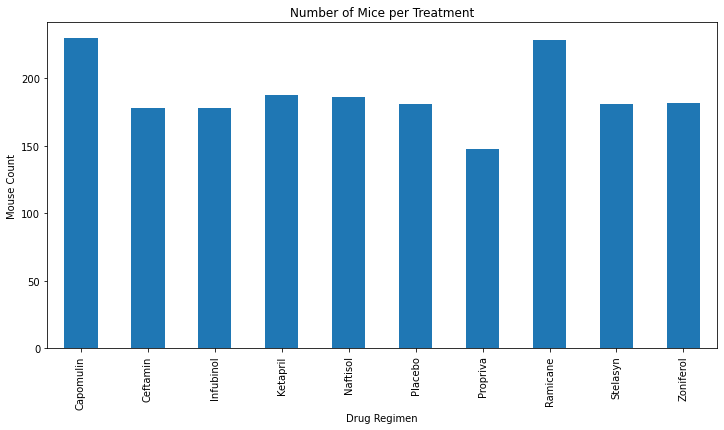

In [322]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
barData = cleanCombined_df.groupby(['drug_regimen']).count()['mouse_id']
plt.ylim(0,barData.max() * 1.05) # y Lim is 5% greater than max value
barData.plot.bar(figsize=(12,6))
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Number of Mice per Treatment")
plt.savefig("../Images/pandas_mice_number_bar.png", bbox_inches = "tight")

plt.show()

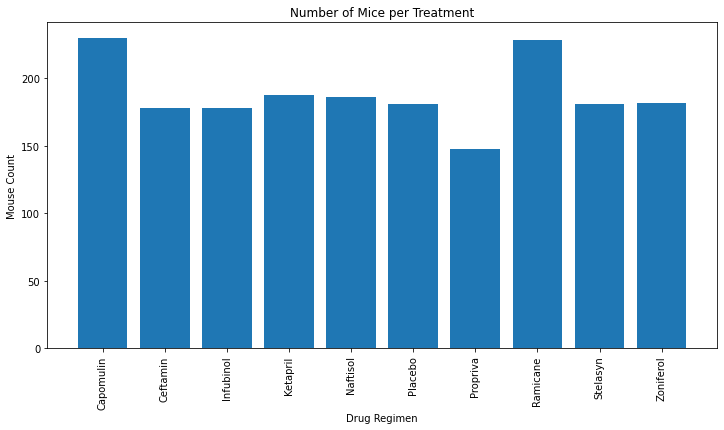

In [323]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig1, ax1 = plt.subplots(figsize=(12, 6))
barY = barData.to_list() # using the bars from the previous graph
barX = [i for i in range(len(barData))] # counting the range of values
xLabels = barData.reset_index()['drug_regimen'].to_list() # taking labels straight from the data

plt.ylim(0,barData.max() *1.05) # setting yLim to 5% greater than max 
plt.bar(barX,barY)
plt.xticks(barX,xLabels,rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Number of Mice per Treatment")
plt.savefig("../Images/plt_mice_number_bar.png", bbox_inches = "tight")

plt.show()

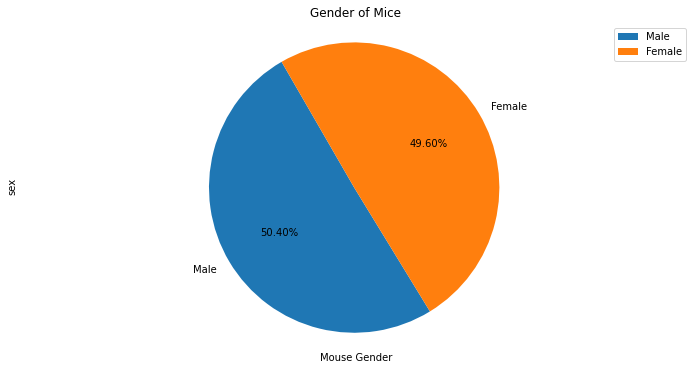

In [324]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Adding gendered data to new dataframe
singleMouse = cleanCombined_df.drop_duplicates('mouse_id')
genderPie = pd.DataFrame(singleMouse['sex'].value_counts())
genderPie

genderPie.plot.pie(y='sex',figsize=(12,6),startangle=120,autopct="%1.2f%%")
plt.axis("equal")
plt.xlabel("Mouse Gender")
plt.title("Gender of Mice")
plt.savefig("../Images/pandas_gender_pie.png", bbox_inches = "tight")

plt.show()

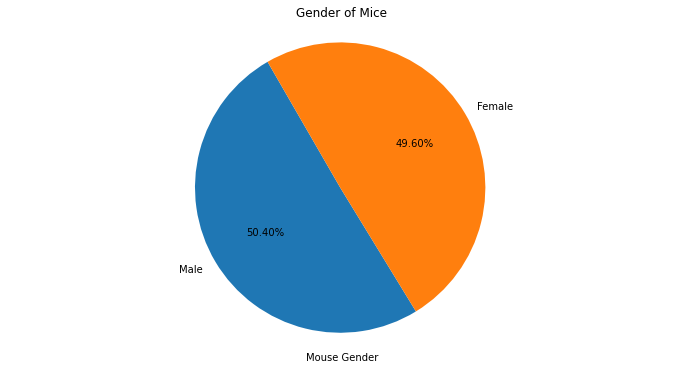

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pieLabels = genderPie.reset_index()['index'].to_list()
pieSize = genderPie['sex'].to_list()

fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.pie(pieSize,labels=pieLabels,startangle=120,autopct="%1.2f%%")
plt.axis("equal")
plt.xlabel("Mouse Gender")
plt.title("Gender of Mice")
plt.savefig("../Images/plt_gender_pie.png", bbox_inches = "tight")

plt.show()

## Quartiles, Outliers and Boxplots

In [326]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = cleanCombined_df.loc[cleanCombined_df["drug_regimen"] == 'Capomulin']
capomulinMax = capomulin_df.loc[capomulin_df.groupby('mouse_id')['timepoint'].idxmax()]

ramicane_df = cleanCombined_df.loc[cleanCombined_df["drug_regimen"] == 'Ramicane']
ramicaneMax = ramicane_df.loc[ramicane_df.groupby('mouse_id')['timepoint'].idxmax()]

infubinol_df = cleanCombined_df.loc[cleanCombined_df["drug_regimen"] == 'Infubinol']
infubinolMax = infubinol_df.loc[infubinol_df.groupby('mouse_id')['timepoint'].idxmax()]

ceftamin_df = cleanCombined_df.loc[cleanCombined_df["drug_regimen"] == 'Ceftamin']
ceftaminMax = ceftamin_df.loc[ceftamin_df.groupby('mouse_id')['timepoint'].idxmax()]

# Don't need to merge data frames if you use idxmax :thinking:

In [327]:
# Put treatments into a list for for loop
treatments = [capomulinMax,ramicaneMax,infubinolMax,ceftaminMax]
drugList = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Now - instructions don't say that we're going to need any of this later
    # So I'm not keeping it
    # I could, but I whats the point as the grading rubic just says I need to calculate it
    drug = treatment['drug_regimen'].iloc[0]
    drugList.append(drug) # add to list for labels later
    tumors = treatment["tumor_volume_(mm3)"]
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # This will create a dataframe even if there are no results
    outliers = treatment.loc[(treatment['tumor_volume_(mm3)'] < lower_bound) | (treatment['tumor_volume_(mm3)'] > upper_bound)]
    if outliers.empty == False:
        # If there are results, tell us
        print(f'Possible Outliers for {drug}')
        print(outliers['mouse_id'].to_list())
    else:
        # if not, oh well
        print(f'No Outliers for {drug}')


No Outliers for Capomulin
No Outliers for Ramicane
Possible Outliers for Infubinol
['c326']
No Outliers for Ceftamin


In [328]:
capomulinMax['drug_regimen'].iloc[0]

'Capomulin'

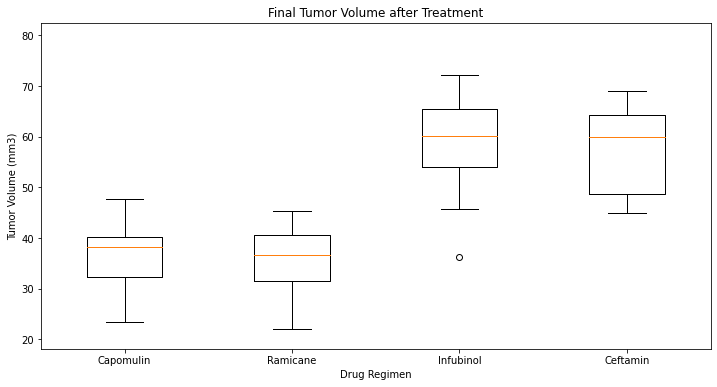

In [329]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxes = [capomulinMax["tumor_volume_(mm3)"], ramicaneMax["tumor_volume_(mm3)"], infubinolMax["tumor_volume_(mm3)"], ceftaminMax["tumor_volume_(mm3)"]] # Should probably create this list in the loop.
# regimenLabesl = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

boxYLimMod = cleanCombined_df['tumor_volume_(mm3)'].max()*0.05 # ylim %5 greater than max

fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.ylim(cleanCombined_df['tumor_volume_(mm3)'].min()-boxYLimMod,cleanCombined_df['tumor_volume_(mm3)'].max()+boxYLimMod)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume after Treatment')
ax1.boxplot(boxes, labels=drugList) # labels are from list in loop
plt.savefig("../Images/tumor_vol_per_regimen.png", bbox_inches = "tight")


plt.show()

## Line and Scatter Plots

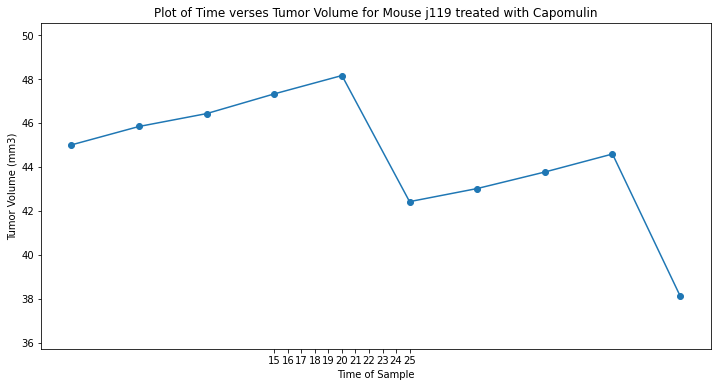

In [330]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Selectig a single mouse with sample - your results will vary
capomulinSample = capomulin_df.sample()['mouse_id']
lineMouse = capomulin_df.loc[capomulin_df['mouse_id'] == capomulinSample.item()]
lineMouse

lineX = lineMouse['timepoint']
lineY = lineMouse['tumor_volume_(mm3)']
barTitle = f'Plot of Time verses Tumor Volume for Mouse {capomulinSample.item()} treated with Capomulin' # create title based on sample mouse

lineYLimMod = lineMouse['tumor_volume_(mm3)'].max()*0.05 # 5% etc etc

plt.subplots(figsize=(12, 6))
plt.ylim(lineMouse['tumor_volume_(mm3)'].min()-lineYLimMod,lineMouse['tumor_volume_(mm3)'].max()+lineYLimMod)
plt.xticks(np.arange(min(scatX), max(scatX)+1, 1.0))
plt.xlabel("Time of Sample")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(lineX, lineY,marker='o')
plt.title(barTitle)
plt.savefig("../Images/time_vs_tumor_vol_line_sample.png", bbox_inches = "tight")

plt.show()

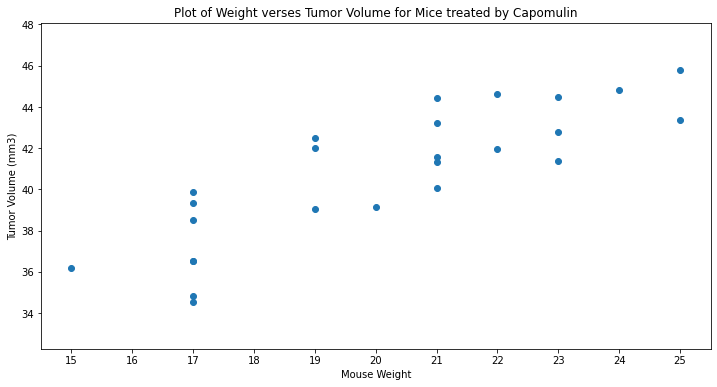

In [331]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
meanCapomulin = capomulin_df.groupby('mouse_id').mean()
scatX = meanCapomulin['weight_(g)']
scatY = meanCapomulin['tumor_volume_(mm3)']
scatTitle = f'Plot of Weight verses Tumor Volume for Mice treated by Capomulin'

scatYLimMod = scatY.max()*0.05

plt.subplots(figsize=(12, 6))
plt.ylim(scatY.min()-scatYLimMod,scatY.max()+scatYLimMod)
plt.xticks(np.arange(min(scatX), max(scatX)+1, 1.0)) # set ticks so it looks nice
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(scatX, scatY,marker='o')
plt.title(scatTitle)
plt.savefig("../Images/weight_vs_tumor_vol_scatter.png", bbox_inches = "tight")

plt.show()

## Correlation and Regression

In [334]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulinCoef = sts.pearsonr(scatX,scatY)[0]
print(f'Correlation Coefficient: {capomulinCoef}')
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(scatX, scatY)
capomulinRegression = scatX * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


Correlation Coefficient: 0.8419363424694719


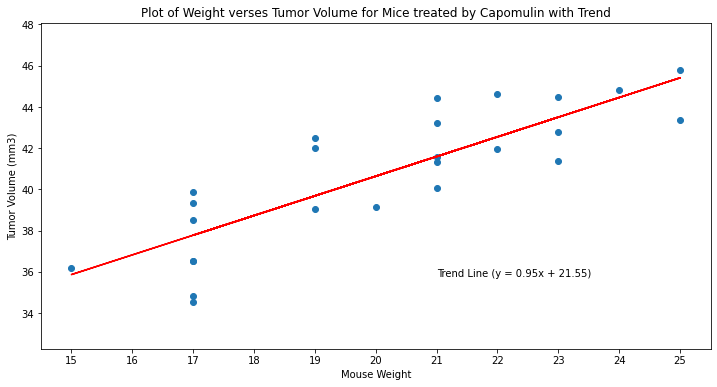

In [333]:
# Create plot to show regression

plt.subplots(figsize=(12, 6))
plt.ylim(scatY.min()-scatYLimMod,scatY.max()+scatYLimMod) # bound by 5% values 
plt.xticks(np.arange(min(scatX), max(scatX)+1, 1.0)) # set ticks so it looks gooder
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(scatX, scatY,marker='o')
plt.plot(scatX,capomulinRegression,'r-')
plt.annotate('Trend Line ('+line_eq+')',xy=(scatX.median(),scatY.mean()-5))
plt.title(scatTitle+' with Trend')
plt.savefig("../Images/weight_vs_tumor_vol_scatter_with_trend.png", bbox_inches = "tight")

plt.show()